In [ ]:
#Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.device('/device:GPU:0')
import csv
#from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
#from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
#from PIL import Image, ImageOps
from tensorflow import keras
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, BatchNormalization, Activation, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
#import tqdm
#import joblib
from sklearn.cluster import KMeans
from skimage import io # for loading images
import imageio # export images to files
import sys
#from PIL import Image as pil
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
#from glob import glob
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import layers
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
#from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
#Deciding random seed 
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Connecting to google drive for data
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/MyDrive/'

Mounted at /content/gdrive


# EDA

In [ ]:
df = pd.read_csv(r"C:\Users\ganes\ISIC_2019_Training_GroundTruth.csv")

df.head(10)

FileNotFoundError: ignored

In [ ]:
df.describe()

,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
count,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.0
mean,0.178516,0.508270,0.131183,0.034227,0.103588,0.009435,0.009988,0.024792,0.0
std,0.382954,0.499941,0.337607,0.181815,0.304732,0.096677,0.099440,0.155493,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   25331 non-null  object 
 1   MEL     25331 non-null  float64
 2   NV      25331 non-null  float64
 3   BCC     25331 non-null  float64
 4   AK      25331 non-null  float64
 5   BKL     25331 non-null  float64
 6   DF      25331 non-null  float64
 7   VASC    25331 non-null  float64
 8   SCC     25331 non-null  float64
 9   UNK     25331 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.9+ MB


In [ ]:
df.shape

(25331, 10)

In [ ]:
df.columns

Index(['image', 'MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK'], dtype='object')

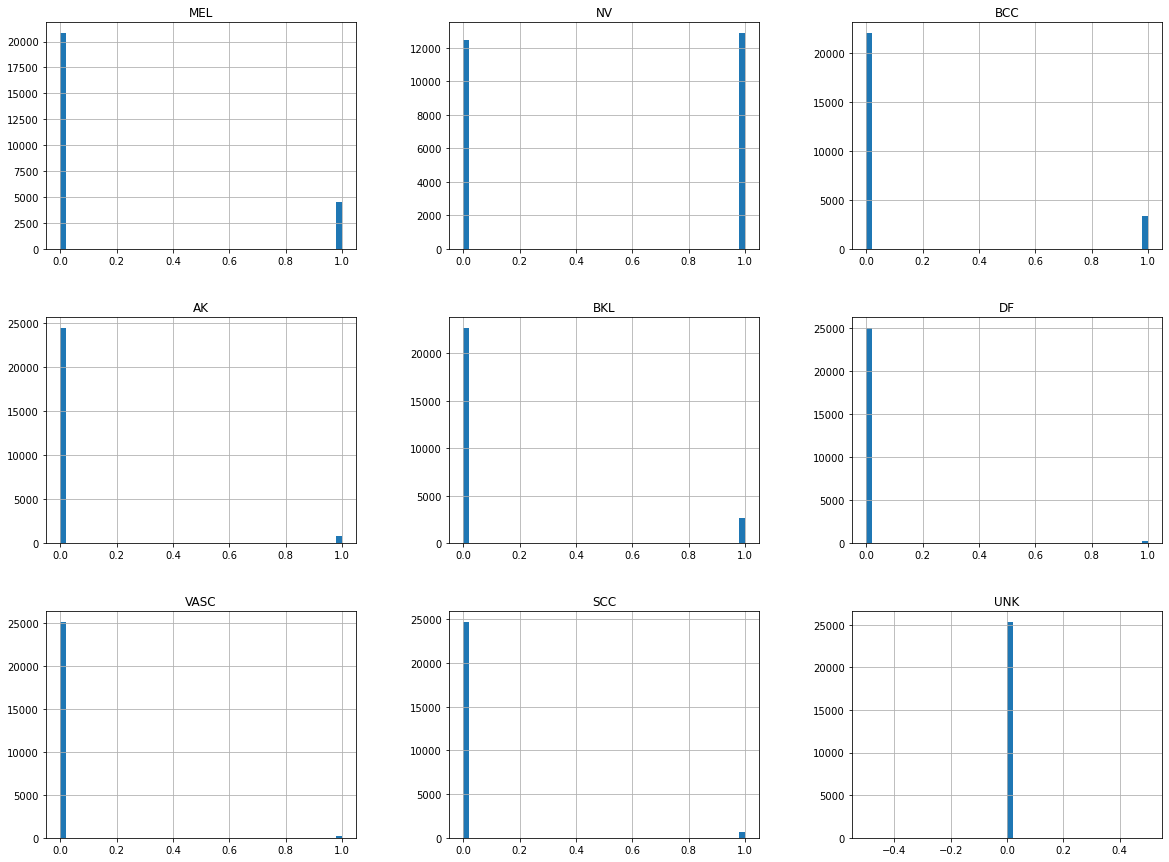

In [ ]:
# Plotting histograms of all 9 diseases
with tf.device('/device:GPU:0'):
    df.hist(bins=50, figsize=(20,15))
    plt.show()

In [ ]:
#Combining Image url with csv file

with tf.device('/device:GPU:0'):
    df['image_url'] = 'e'    # creating a column with dummy value 'e' at the beginning
    for i in range(len(df)):
        image_id = df.iloc[i]['image']
        df.iloc[i, df.columns.get_loc('image_url')] = r'C:/Users/ganes/Downloads/ISIC_2019_Training_Input/'+str(image_id)+'.jpg'
    print(df)

              image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK  \
0      ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
1      ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
2      ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
3      ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
4      ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
...             ...  ...  ...  ...  ...  ...  ...   ...  ...  ...   
25326  ISIC_0073247  0.0  0.0  1.0  0.0  0.0  0.0   0.0  0.0  0.0   
25327  ISIC_0073248  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0   
25328  ISIC_0073249  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
25329  ISIC_0073251  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
25330  ISIC_0073254  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0   

                                               image_url  
0      C:/Users/ganes/Downloads/ISIC_2019_Training_In...  
1      C:/Users/ganes/Downloads/ISIC_2019_Training_In

In [ ]:
df['image_url'][0]

'C:/Users/ganes/Downloads/ISIC_2019_Training_Input/ISIC_0000000.jpg'

In [ ]:
#Reading and creating dataframe of second csv file from drive ISIC_2019_10000_Training_Metadata

df2 = pd.read_csv(r"C:\Users\ganes\ISIC_2019_Training_Metadata.csv")
df2.head(10)

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male
5,ISIC_0000006,25.0,posterior torso,NaN,female
6,ISIC_0000007,25.0,posterior torso,NaN,female
7,ISIC_0000008,30.0,anterior torso,NaN,female
8,ISIC_0000009,30.0,anterior torso,NaN,female
9,ISIC_0000010,35.0,posterior torso,NaN,female


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image                25331 non-null  object 
 1   age_approx           24894 non-null  float64
 2   anatom_site_general  22700 non-null  object 
 3   lesion_id            23247 non-null  object 
 4   sex                  24947 non-null  object 
dtypes: float64(1), object(4)
memory usage: 989.6+ KB


In [ ]:
#Merging both dataframes df and df2 with image column common

df3 = df.merge(df2, left_on='image',right_on='image')
df3.head(10)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,image_url,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...,55.0,anterior torso,NaN,female
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...,30.0,anterior torso,NaN,female
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...,60.0,upper extremity,NaN,female
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...,30.0,upper extremity,NaN,male
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...,80.0,posterior torso,NaN,male
5,ISIC_0000006,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...,25.0,posterior torso,NaN,female
6,ISIC_0000007,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...,25.0,posterior torso,NaN,female
7,ISIC_0000008,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...,30.0,anterior torso,NaN,female
8,ISIC_0000009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...,30.0,anterior torso,NaN,female
9,ISIC_0000010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...,35.0,posterior torso,NaN,female


In [ ]:
# Dropping rows with NaN values

df3.dropna(axis=0,inplace=True)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21311 entries, 1459 to 25330
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image                21311 non-null  object 
 1   MEL                  21311 non-null  float64
 2   NV                   21311 non-null  float64
 3   BCC                  21311 non-null  float64
 4   AK                   21311 non-null  float64
 5   BKL                  21311 non-null  float64
 6   DF                   21311 non-null  float64
 7   VASC                 21311 non-null  float64
 8   SCC                  21311 non-null  float64
 9   UNK                  21311 non-null  float64
 10  image_url            21311 non-null  object 
 11  age_approx           21311 non-null  float64
 12  anatom_site_general  21311 non-null  object 
 13  lesion_id            21311 non-null  object 
 14  sex                  21311 non-null  object 
dtypes: float64(10), object(5)
memory 

In [ ]:
df3.drop(['sex','age_approx','lesion_id','anatom_site_general'], axis=1, inplace=True)

In [ ]:
df3.columns

Index(['image', 'MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK',
       'image_url'],
      dtype='object')

In [ ]:
df3

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,image_url
1459,ISIC_0012653_downsampled,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...
1460,ISIC_0012654_downsampled,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...
1461,ISIC_0012655_downsampled,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...
1462,ISIC_0012656_downsampled,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...
1463,ISIC_0012657_downsampled,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...
...,...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...


In [ ]:
df3_df = df3[df3['DF']==1]
df3_vasc = df3[df3['VASC']==1]
df3_ak = df3[df3['AK']==1]
df3_scc = df3[df3['SCC']==1]
df3_bcc = df3[df3['BCC']==1]
df3_mel = df3[df3['MEL']==1]
df3_bkl = df3[df3['BKL']==1]
df3_nv = df3[df3['NV']==1]

In [ ]:
df3_df

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,image_url
2915,ISIC_0024318,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...
2927,ISIC_0024330,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...
2983,ISIC_0024386,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...
2993,ISIC_0024396,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...
3150,ISIC_0024553,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...
...,...,...,...,...,...,...,...,...,...,...,...
25145,ISIC_0072970,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...
25238,ISIC_0073112,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...
25256,ISIC_0073141,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...
25286,ISIC_0073189,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...


In [ ]:
df_path = r'C:\Users\ganes\images_full\DF_Aug'
vasc_path = r'C:\Users\ganes\images_full\VASC_Aug'
ak_path = r'C:\Users\ganes\images_full\AK_Aug'
scc_path = r'C:\Users\ganes\images_full\SCC_Aug'
bcc_path = r'C:\Users\ganes\images_full\BCC_Aug'
mel_path = r'C:\Users\ganes\images_full\MEL_Aug'
bkl_path = r'C:\Users\ganes\images_full\BKL_Aug'

In [ ]:
nv_path = r'C:\Users\ganes\images_full\NV_full'

In [ ]:
datagen = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, vertical_flip = True)

In [ ]:
# Data Augmentation applied for BCC disease
with tf.device('/device:GPU:0'):

    for i in df3_bcc['image_url']:
        image = np.expand_dims(imageio.imread(i), 0)
        datagen.fit(image)
        for x, val in zip(datagen.flow(image,                    
            save_to_dir=bcc_path,     
            save_prefix='BCC',        
            save_format='jpg'),range(4)) :     
            pass

In [ ]:
# Data Augmentation applied for MEL disease
with tf.device('/device:GPU:0'):

    for i in df3_mel['image_url']:
        image = np.expand_dims(imageio.imread(i), 0)
        datagen.fit(image)
        for x, val in zip(datagen.flow(image,                    
            save_to_dir=mel_path,     
            save_prefix='MEL',        
            save_format='jpg'),range(3)) :     
            pass

In [ ]:
print("AK:",len(df3_ak),"BCC:",len(df3_bcc),"BKL:",len(df3_bkl),"DF:",len(df3_df),"MEL:",len(df3_mel),"NV:",len(df3_nv),"SCC:",len(df3_scc),"VASC:",len(df3_vasc))

AK: 845 BCC: 3245 BKL: 2295 DF: 235 MEL: 4101 NV: 9746 SCC: 622 VASC: 222


In [ ]:
# Data Augmentation applied for BKL disease
with tf.device('/device:GPU:0'):

    for i in df3_bkl['image_url']:
        image = np.expand_dims(imageio.imread(i), 0)
        datagen.fit(image)
        for x, val in zip(datagen.flow(image,                    
            save_to_dir=bkl_path,     
            save_prefix='BKL',        
            save_format='jpg'),range(5)) :     
            pass

In [ ]:
import shutil

import os


dest = df_path

n = []
for i in df3_df['image_url']:
    try:
        shutil.move(i, dest)
    except:
        n.append(i)
        continue

NameError: ignored

In [ ]:
df3_nv

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,image_url
1459,ISIC_0012653_downsampled,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...
1460,ISIC_0012654_downsampled,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...
1461,ISIC_0012655_downsampled,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...
1462,ISIC_0012656_downsampled,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...
1463,ISIC_0012657_downsampled,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...
...,...,...,...,...,...,...,...,...,...,...,...
25317,ISIC_0073232,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...
25321,ISIC_0073240,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...
25323,ISIC_0073244,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...
25324,ISIC_0073245,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C:/Users/ganes/Downloads/ISIC_2019_Training_In...


In [ ]:
#CSV generated for DF disease
with tf.device('/device:GPU:0'):

    with open(r'C:/Users/ganes/df.csv', 'a', newline='') as file:
            writer = csv.writer(file)
            img_name = os.listdir(df_path)
            for j in range(len(img_name)):
                writer.writerow([img_name[j], 0,0,0,0,0,1,0,0,0, r'C:/Users/ganes/images_full/DF_Aug/'+img_name[j]])

In [ ]:
#CSV generated for VASC disease
with tf.device('/device:GPU:0'):

    with open(r'C:/Users/ganes/vasc.csv', 'a', newline='') as file:
            writer = csv.writer(file)
            img_name = os.listdir(vasc_path)
            for j in range(len(img_name)):
                writer.writerow([img_name[j], 0,0,0,0,0,0,1,0,0, r'C:/Users/ganes/images_full/VASC_Aug/'+img_name[j]])

In [ ]:
#CSV generated for AK disease
with tf.device('/device:GPU:0'):

    with open(r'C:/Users/ganes/ak.csv', 'a', newline='') as file:
            writer = csv.writer(file)
            img_name = os.listdir(ak_path)
            for j in range(len(img_name)):
                writer.writerow([img_name[j], 0,0,0,1,0,0,0,0,0, r'C:/Users/ganes/images_full/AK_Aug/'+img_name[j]])

In [ ]:
#CSV generated for SCC disease
with tf.device('/device:GPU:0'):

    with open(r'C:/Users/ganes/scc.csv', 'a', newline='') as file:
            writer = csv.writer(file)
            img_name = os.listdir(scc_path)
            for j in range(len(img_name)):
                writer.writerow([img_name[j], 0,0,0,0,0,0,0,1,0, r'C:/Users/ganes/images_full/SCC_Aug/'+img_name[j]])

In [ ]:
#CSV generated for BCC disease
with tf.device('/device:GPU:0'):

    with open(r'C:/Users/ganes/bcc.csv', 'a', newline='') as file:
            writer = csv.writer(file)
            img_name = os.listdir(bcc_path)
            for j in range(len(img_name)):
                writer.writerow([img_name[j], 0,0,1,0,0,0,0,0,0, r'C:/Users/ganes/images_full/BCC_Aug/'+img_name[j]])

In [ ]:
#CSV generated for MEL disease
with tf.device('/device:GPU:0'):

    with open(r'C:/Users/ganes/mel.csv', 'a', newline='') as file:
            writer = csv.writer(file)
            img_name = os.listdir(mel_path)
            for j in range(len(img_name)):
                writer.writerow([img_name[j], 1,0,0,0,0,0,0,0,0,r'C:/Users/ganes/images_full/MEL_Aug/'+img_name[j]])

In [ ]:
#CSV generated for BKL disease
with tf.device('/device:GPU:0'):

    with open(r'C:/Users/ganes/bkl.csv', 'a', newline='') as file:
            writer = csv.writer(file)
            img_name = os.listdir(bkl_path)
            for j in range(len(img_name)):
                writer.writerow([img_name[j], 0,0,0,0,1,0,0,0,0,r'C:/Users/ganes/images_full/BKL_Aug/'+img_name[j]])

In [ ]:
#CSV generated for BKL disease
with tf.device('/device:GPU:0'):

    with open(r'C:/Users/ganes/nv.csv', 'a', newline='') as file:
            writer = csv.writer(file)
            img_name = os.listdir(nv_path)
            for j in range(len(img_name)):
                writer.writerow([img_name[j], 0,1,0,0,0,0,0,0,0,r'C:/Users/ganes/images_full/NV_full/'+img_name[j]])

In [ ]:
ak = pd.read_csv(r'C:/Users/ganes/ak.csv')
bcc = pd.read_csv(r'C:/Users/ganes/bcc.csv')
bkl = pd.read_csv(r'C:/Users/ganes/bkl.csv')
df = pd.read_csv(r'C:/Users/ganes/df.csv')
mel = pd.read_csv(r'C:/Users/ganes/mel.csv')
nv = pd.read_csv(r'C:/Users/ganes/nv.csv')
scc = pd.read_csv(r'C:/Users/ganes/scc.csv')
vasc = pd.read_csv(r'C:/Users/ganes/vasc.csv')

In [ ]:
df3 = pd.concat([mel, nv, bcc, ak, bkl, df, vasc, scc])

In [ ]:
df3

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,image_url
0,MEL_0_0.jpg,1,0,0,0,0,0,0,0,0,C:/Users/ganes/images_full/MEL_Aug/MEL_0_0.jpg
1,MEL_0_10.jpg,1,0,0,0,0,0,0,0,0,C:/Users/ganes/images_full/MEL_Aug/MEL_0_10.jpg
2,MEL_0_100.jpg,1,0,0,0,0,0,0,0,0,C:/Users/ganes/images_full/MEL_Aug/MEL_0_100.jpg
3,MEL_0_1000.jpg,1,0,0,0,0,0,0,0,0,C:/Users/ganes/images_full/MEL_Aug/MEL_0_1000.jpg
4,MEL_0_1001.jpg,1,0,0,0,0,0,0,0,0,C:/Users/ganes/images_full/MEL_Aug/MEL_0_1001.jpg
...,...,...,...,...,...,...,...,...,...,...,...
7297,SCC_0_9995.jpg,0,0,0,0,0,0,0,1,0,C:/Users/ganes/images_full/SCC_Aug/SCC_0_9995.jpg
7298,SCC_0_9996.jpg,0,0,0,0,0,0,0,1,0,C:/Users/ganes/images_full/SCC_Aug/SCC_0_9996.jpg
7299,SCC_0_9997.jpg,0,0,0,0,0,0,0,1,0,C:/Users/ganes/images_full/SCC_Aug/SCC_0_9997.jpg
7300,SCC_0_9998.jpg,0,0,0,0,0,0,0,1,0,C:/Users/ganes/images_full/SCC_Aug/SCC_0_9998.jpg


In [ ]:
df3.columns

Index(['image', 'MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK',
       'image_url'],
      dtype='object')

In [ ]:
#Splitting dataset into X and y
df4_y = df3[df3.columns[1:10]]
df4_X = df3.drop(df3.columns[1:10], axis=1)
df4_y

,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7297,0,0,0,0,0,0,0,1,0
7298,0,0,0,0,0,0,0,1,0
7299,0,0,0,0,0,0,0,1,0
7300,0,0,0,0,0,0,0,1,0


In [ ]:
df4_X

,image,image_url
0,MEL_0_0.jpg,C:/Users/ganes/images_full/MEL_Aug/MEL_0_0.jpg
1,MEL_0_10.jpg,C:/Users/ganes/images_full/MEL_Aug/MEL_0_10.jpg
2,MEL_0_100.jpg,C:/Users/ganes/images_full/MEL_Aug/MEL_0_100.jpg
3,MEL_0_1000.jpg,C:/Users/ganes/images_full/MEL_Aug/MEL_0_1000.jpg
4,MEL_0_1001.jpg,C:/Users/ganes/images_full/MEL_Aug/MEL_0_1001.jpg
...,...,...
7297,SCC_0_9995.jpg,C:/Users/ganes/images_full/SCC_Aug/SCC_0_9995.jpg
7298,SCC_0_9996.jpg,C:/Users/ganes/images_full/SCC_Aug/SCC_0_9996.jpg
7299,SCC_0_9997.jpg,C:/Users/ganes/images_full/SCC_Aug/SCC_0_9997.jpg
7300,SCC_0_9998.jpg,C:/Users/ganes/images_full/SCC_Aug/SCC_0_9998.jpg


In [ ]:
df4_y.columns

Index(['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK'], dtype='object')

In [ ]:
# Creating a new column 'label'

dummy = df4_y
dummy['label'] = "UNK"

for i in dummy.columns:
    # i is column name
    x = 0
    for j in dummy[i]:
        # j is the value of the column i
        if j==1.0:
            dummy.iloc[x, dummy.columns.get_loc('label')] = i
        x+=1
dummy

<ipython-input-138-255e4e531e07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy['label'] = "UNK"
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,label
0,1,0,0,0,0,0,0,0,0,MEL
1,1,0,0,0,0,0,0,0,0,MEL
2,1,0,0,0,0,0,0,0,0,MEL
3,1,0,0,0,0,0,0,0,0,MEL
4,1,0,0,0,0,0,0,0,0,MEL
...,...,...,...,...,...,...,...,...,...,...
7297,0,0,0,0,0,0,0,1,0,SCC
7298,0,0,0,0,0,0,0,1,0,SCC
7299,0,0,0,0,0,0,0,1,0,SCC
7300,0,0,0,0,0,0,0,1,0,SCC


In [ ]:
# Distibution of each class in df4_y

df4_y['label'].value_counts()

NV      9746
MEL     8019
BCC     8004
BKL     7449
AK      7416
DF      7327
SCC     7302
VASC    7156
Name: label, dtype: int64

In [ ]:
#Defining class numbers
def assignNewLabels(label):
    if label == 'MEL':
        return 0
    elif label == 'NV':
        return 1
    elif label == 'BCC':
        return 2
    elif label=='AK':
        return 3
    elif label=='BKL':
        return 4
    elif label=='DF':
        return 5
    elif label=='VASC':
        return 6
    elif label=='SCC':
        return 7
    else:
        return 8
dummy['Num_label'] = dummy['label'].apply(assignNewLabels)
dummy

,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,label,Num_label
0,1,0,0,0,0,0,0,0,0,MEL,0
1,1,0,0,0,0,0,0,0,0,MEL,0
2,1,0,0,0,0,0,0,0,0,MEL,0
3,1,0,0,0,0,0,0,0,0,MEL,0
4,1,0,0,0,0,0,0,0,0,MEL,0
...,...,...,...,...,...,...,...,...,...,...,...
7297,0,0,0,0,0,0,0,1,0,SCC,7
7298,0,0,0,0,0,0,0,1,0,SCC,7
7299,0,0,0,0,0,0,0,1,0,SCC,7
7300,0,0,0,0,0,0,0,1,0,SCC,7


In [ ]:
df4_y_new = dummy['Num_label']
df4_y_new

0       0
1       0
2       0
3       0
4       0
       ..
7297    7
7298    7
7299    7
7300    7
7301    7
Name: Num_label, Length: 62419, dtype: int64

#### Applying Stratified Sampling on the dataset

In [ ]:
#Splitting datasets in to  X_train_full, X_test, y_train_full, y_test 

X_train_full, X_test, y_train_full, y_test = train_test_split( df4_X, df4_y_new, test_size=0.15, random_state=42, stratify=df4_y_new)

In [ ]:
print(X_train_full.shape)
print(X_test.shape)
print(y_train_full.shape)
print(y_test.shape)

(53056, 2)
(9363, 2)
(53056,)
(9363,)


In [ ]:
y_train_full.value_counts()

1    8284
0    6816
2    6803
4    6332
3    6303
5    6228
7    6207
6    6083
Name: Num_label, dtype: int64

In [ ]:
y_test.value_counts()

1    1462
0    1203
2    1201
4    1117
3    1113
5    1099
7    1095
6    1073
Name: Num_label, dtype: int64

In [ ]:
#Splitting datasets into validation data as well by taking 10% from x_train and y_train 

X_train, X_valid, y_train, y_valid = train_test_split( X_train_full, y_train_full, test_size=0.15, random_state=42, stratify=y_train_full)

In [ ]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(45097, 2)
(7959, 2)
(45097,)
(7959,)


In [ ]:
y_train.value_counts()

1    7041
0    5794
2    5782
4    5382
3    5357
5    5294
7    5276
6    5171
Name: Num_label, dtype: int64

In [ ]:
y_valid.value_counts()

1    1243
0    1022
2    1021
4     950
3     946
5     934
7     931
6     912
Name: Num_label, dtype: int64

In [ ]:
X_train

,image,image_url
545,VASC_0_1422.jpg,C:/Users/ganes/images_full/VASC_Aug/VASC_0_142...
4999,AK_0_7073.jpg,C:/Users/ganes/images_full/AK_Aug/AK_0_7073.jpg
4634,MEL_0_6181.jpg,C:/Users/ganes/images_full/MEL_Aug/MEL_0_6181.jpg
3794,ISIC_0030639.jpg,C:/Users/ganes/images_full/NV_full/ISIC_003063...
6871,DF_0_9720.jpg,C:/Users/ganes/images_full/DF_Aug/DF_0_9720.jpg
...,...,...
32,SCC_0_1034.jpg,C:/Users/ganes/images_full/SCC_Aug/SCC_0_1034.jpg
8333,ISIC_0066651.jpg,C:/Users/ganes/images_full/NV_full/ISIC_006665...
2278,VASC_0_3697.jpg,C:/Users/ganes/images_full/VASC_Aug/VASC_0_369...
5210,AK_0_7333.jpg,C:/Users/ganes/images_full/AK_Aug/AK_0_7333.jpg


In [ ]:
for i in X_train['image']:
    if i.startswith('MEL'):
        shutil.move(r'C:/Users/ganes/images_full/MEL_Aug/'+i, r'C:/Users/ganes/train/MEL')

In [ ]:
for i in X_train['image']:
    if i.startswith('AK'):
        shutil.move(r'C:/Users/ganes/images_full/AK_Aug/'+i, r'C:/Users/ganes/train/AK')

In [ ]:
for i in X_train['image']:
    if i.startswith('BCC'):
        shutil.move(r'C:/Users/ganes/images_full/BCC_Aug/'+i, r'C:/Users/ganes/train/BCC')

In [ ]:
for i in X_train['image']:
    if i.startswith('BKL'):
        shutil.move(r'C:/Users/ganes/images_full/BKL_Aug/'+i, r'C:/Users/ganes/train/BKL')

In [ ]:
for i in X_train['image']:
    if i.startswith('SCC'):
        shutil.move(r'C:/Users/ganes/images_full/SCC_Aug/'+i, r'C:/Users/ganes/train/SCC')

In [ ]:
isic_df=[]

for i in os.listdir(r'C:/Users/ganes/images_full/DF_Aug/'):
    if i.startswith('ISIC'):
        isic_df.append(i)

In [ ]:
same=[]
for i in X_train['image']:
    for j in isic_df:
        if i==j:
            same.append(i)
        else:
            continue

In [ ]:
for i in same:
    shutil.move(r'C:/Users/ganes/images_full/DF_Aug/'+i, r'C:/Users/ganes/train/DF')

In [ ]:
df_count=[]

for i in os.listdir(r'C:/Users/ganes/images_full/DF_Aug/'):
    if i.startswith('DF'):
        df_count.append(i)

In [ ]:
same_df=[]
for i in X_train['image']:
    for j in df_count:
        if i==j:
            same_df.append(i)
        else:
            continue

In [ ]:
len(same_df)

5119

In [ ]:
for i in same_df:
    shutil.move(r'C:/Users/ganes/images_full/DF_Aug/'+i, r'C:/Users/ganes/train/DF')

In [ ]:
vasc_count=[]

for i in os.listdir(r'C:/Users/ganes/images_full/VASC_Aug/'):
    if i.startswith('VASC'):
        vasc_count.append(i)

In [ ]:
same_v=[]
for i in X_train['image']:
    for j in vasc_count:
        if i==j:
            same_v.append(i)
        else:
            continue

In [ ]:
len(same_v)

5019

In [ ]:
for i in same_v:
    shutil.move(r'C:/Users/ganes/images_full/VASC_Aug/'+i, r'C:/Users/ganes/train/VASC')

In [ ]:
isic_v=[]

for i in os.listdir(r'C:/Users/ganes/images_full/VASC_Aug/'):
    if i.startswith('ISIC'):
        isic_v.append(i)

In [ ]:
same=[]
for i in X_train['image']:
    for j in isic_v:
        if i==j:
            same.append(i)
        else:
            continue

NameError: name 'X_train' is not defined

In [ ]:
len(same)

152

In [ ]:
for i in same:
    shutil.move(r'C:/Users/ganes/images_full/VASC_Aug/'+i, r'C:/Users/ganes/train/VASC')

In [ ]:
x = os.listdir(r'C:/Users/ganes/images_full/NV_full/')
x

['ISIC_0012653_downsampled.jpg',
 'ISIC_0012654_downsampled.jpg',
 'ISIC_0012655_downsampled.jpg',
 'ISIC_0012656_downsampled.jpg',
 'ISIC_0012657_downsampled.jpg',
 'ISIC_0012658_downsampled.jpg',
 'ISIC_0012659_downsampled.jpg',
 'ISIC_0012660_downsampled.jpg',
 'ISIC_0012662_downsampled.jpg',
 'ISIC_0012663_downsampled.jpg',
 'ISIC_0012664_downsampled.jpg',
 'ISIC_0012665_downsampled.jpg',
 'ISIC_0012669_downsampled.jpg',
 'ISIC_0012670_downsampled.jpg',
 'ISIC_0012671_downsampled.jpg',
 'ISIC_0012672_downsampled.jpg',
 'ISIC_0012673_downsampled.jpg',
 'ISIC_0012674_downsampled.jpg',
 'ISIC_0012675_downsampled.jpg',
 'ISIC_0012676_downsampled.jpg',
 'ISIC_0012677_downsampled.jpg',
 'ISIC_0012679_downsampled.jpg',
 'ISIC_0012680_downsampled.jpg',
 'ISIC_0012681_downsampled.jpg',
 'ISIC_0012682_downsampled.jpg',
 'ISIC_0012683_downsampled.jpg',
 'ISIC_0012684_downsampled.jpg',
 'ISIC_0012685_downsampled.jpg',
 'ISIC_0012690_downsampled.jpg',
 'ISIC_0012692_downsampled.jpg',
 'ISIC_001

In [ ]:
same_nv=[]
for i in X_train['image']:
    for j in x:
        if(i==j):
            same_nv.append(i)
        else:
            continue

In [ ]:
for i in same_nv:
    shutil.move(r'C:/Users/ganes/images_full/NV_full/'+i, r'C:/Users/ganes/train/NV')

In [ ]:
X_train.to_csv(r'C:/Users/ganes/X_train.csv', index = False)

In [ ]:
X_train=pd.read_csv(r'C:/Users/ganes/X_train.csv')

In [ ]:
y_train.to_csv(r'C:/Users/ganes/y_train.csv', index = False)

In [ ]:
y_train = pd.read_csv(r'C:/Users/ganes/y_train.csv')

In [ ]:
y_train = y_train['Num_label']

In [ ]:
X_valid.to_csv(r'C:/Users/ganes/X_valid.csv', index = False)

In [ ]:
X_valid=pd.read_csv(r'C:/Users/ganes/X_valid.csv')

In [ ]:
y_valid.to_csv(r'C:/Users/ganes/y_valid.csv', index = False)

In [ ]:
y_valid=pd.read_csv(r'C:/Users/ganes/y_valid.csv')

In [ ]:
y_valid=y_valid['Num_label']

In [ ]:
X_test.to_csv(r'C:/Users/ganes/X_test.csv', index = False)

In [ ]:
X_test=pd.read_csv(r'C:/Users/ganes/X_test.csv')

In [ ]:
y_test.to_csv(r'C:/Users/ganes/y_test.csv', index = False)

In [ ]:
y_test=pd.read_csv(r'C:/Users/ganes/y_test.csv')

In [ ]:
y_test=y_test['Num_label']

In [ ]:
import shutil

In [ ]:
for i in X_valid['image']:
    if i.startswith('MEL'):
        shutil.move(r'C:/Users/ganes/images_full/MEL_Aug/'+i, r'C:/Users/ganes/valid/MEL')

In [ ]:
for i in X_valid['image']:
    if i.startswith('AK'):
        shutil.move(r'C:/Users/ganes/images_full/AK_Aug/'+i, r'C:/Users/ganes/valid/AK')

In [ ]:
for i in X_valid['image']:
    if i.startswith('BCC'):
        shutil.move(r'C:/Users/ganes/images_full/BCC_Aug/'+i, r'C:/Users/ganes/valid/BCC')

In [ ]:
for i in X_valid['image']:
    if i.startswith('BKL'):
        shutil.move(r'C:/Users/ganes/images_full/BKL_Aug/'+i, r'C:/Users/ganes/valid/BKL')

In [ ]:
for i in X_valid['image']:
    if i.startswith('SCC'):
        shutil.move(r'C:/Users/ganes/images_full/SCC_Aug/'+i, r'C:/Users/ganes/valid/SCC')

In [ ]:
same=[]
for i in X_valid['image']:
    for j in isic_df:
        if i==j:
            same.append(i)
        else:
            continue

In [ ]:
for i in same:
    shutil.move(r'C:/Users/ganes/images_full/DF_Aug/'+i, r'C:/Users/ganes/valid/DF')

In [ ]:
same_df=[]
for i in X_valid['image']:
    for j in df_count:
        if i==j:
            same_df.append(i)
        else:
            continue

In [ ]:
for i in same_df:
    shutil.move(r'C:/Users/ganes/images_full/DF_Aug/'+i, r'C:/Users/ganes/valid/DF')

In [ ]:
same_v=[]
for i in X_valid['image']:
    for j in vasc_count:
        if i==j:
            same_v.append(i)
        else:
            continue

In [ ]:
for i in same_v:
    shutil.move(r'C:/Users/ganes/images_full/VASC_Aug/'+i, r'C:/Users/ganes/valid/VASC')

In [ ]:
same=[]
for i in X_valid['image']:
    for j in isic_v:
        if i==j:
            same.append(i)
        else:
            continue

In [ ]:
for i in same:
    shutil.move(r'C:/Users/ganes/images_full/VASC_Aug/'+i, r'C:/Users/ganes/valid/VASC')

In [ ]:
x = os.listdir(r'C:/Users/ganes/images_full/NV_full/')

In [ ]:
same_nv=[]
for i in X_valid['image']:
    for j in x:
        if(i==j):
            same_nv.append(i)
        else:
            continue

In [ ]:
for i in same_nv:
    shutil.move(r'C:/Users/ganes/images_full/NV_full/'+i, r'C:/Users/ganes/valid/NV')

## Tensorflow Batch Dataset

In [ ]:
IMG_SIZE = (224,224)
train_dir = '/content/gdrive/MyDrive/train'
valid_dir = '/content/gdrive/MyDrive/valid'

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=32,
                                                            image_size=IMG_SIZE,
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            color_mode='rgb',
                                                            seed=42)

Found 39334 files belonging to 8 classes.


In [ ]:
with tf.device('/device:GPU:0'):
    print(train_dataset)

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 8), dtype=tf.float32, name=None))>


In [ ]:
valid_dataset = tf.keras.utils.image_dataset_from_directory(valid_dir,
                                                            shuffle=True,
                                                            batch_size=32,
                                                            image_size=IMG_SIZE,
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            color_mode='rgb',
                                                            seed=42)

Found 16749 files belonging to 8 classes.


In [ ]:
test_dataset = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/test_new/',
                                                            shuffle=False,
                                                            batch_size=32,
                                                            image_size=IMG_SIZE,
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            color_mode='rgb',
                                                            seed=42)

Found 6346 files belonging to 8 classes.


In [ ]:
with tf.device('/device:GPU:0'):
    print(valid_dataset)

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 8), dtype=tf.float32, name=None))>


In [ ]:
class_names = train_dataset.class_names
print(class_names)

['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC']


In [ ]:
class_names = ['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC']

In [ ]:
normalization_layer = layers.Rescaling(1./255)
#normalization_layer = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [ ]:
with tf.device('/device:GPU:0'):
    normalized_train_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))
    image_batch, labels_batch = next(iter(normalized_train_ds))
    first_image = image_batch[0]
    # Notice the pixel values are now in `[0,1]`.
    # Notice the pixel values are now in `[-1,1]`.
    print(np.min(first_image), np.max(first_image))

0.0 0.96666706


In [ ]:
with tf.device('/device:GPU:0'):
    normalized_valid_ds = valid_dataset.map(lambda x, y: (normalization_layer(x), y))
    image_batch, labels_batch = next(iter(normalized_valid_ds))
    first_image = image_batch[0]
    # Notice the pixel values are now in `[0,1]`.
    print(np.min(first_image), np.max(first_image))

0.1607832 0.8899341


In [ ]:
with tf.device('/device:GPU:0'):
    normalized_test_ds = test_dataset.map(lambda x, y: (normalization_layer(x), y))
    image_batch, labels_batch = next(iter(normalized_test_ds))
    first_image = image_batch[0]
    # Notice the pixel values are now in `[0,1]`.
    print(np.min(first_image), np.max(first_image))

0.0 0.96386576


In [ ]:
#Plotting of accuracy and loss
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

In [ ]:
#AUTOTUNE = tf.data.AUTOTUNE

train_dataset = normalized_train_ds #.prefetch(buffer_size=AUTOTUNE)
validation_dataset = normalized_valid_ds #.prefetch(buffer_size=AUTOTUNE)


In [ ]:
test_dataset = normalized_test_ds

In [ ]:
num_classes = len(class_names)

## Loading the models

In [ ]:
xception_model = tf.keras.models.load_model('/content/gdrive/MyDrive/models/xception_2.h5')
mobilenet_model = tf.keras.models.load_model('/content/gdrive/MyDrive/models/Mobilenet.h5')
densenet_model = tf.keras.models.load_model('/content/gdrive/MyDrive/models/Densenet201.h5')

### Learning Rate Reduction

In [ ]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(
                          monitor='val_loss', factor=0.5, patience=10, verbose=0, 
                          mode='auto', min_lr = 0.000001
                          )

In [ ]:
'''def scheduler(epoch, lr):
      if epoch < 51:
        return lr
      else:
        return lr * tf.math.exp(-0.05)

learning_rate_reduction = tf.keras.callbacks.LearningRateScheduler(scheduler)'''

## Preparing test data

In [ ]:
test_path = '/content/gdrive/MyDrive/test_new/'

In [ ]:
new_img_arr = []

with tf.device('/device:GPU:0'):
    for i in os.listdir(test_path):
        img = tf.keras.utils.load_img(
           test_path+i, target_size=(224, 224), color_mode='rgb'
        )
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)
        new_img_arr.append(img_array)
        print(i)

IsADirectoryError: ignored

## New Xception Model

In [ ]:
with tf.device('/device:GPU:0'):
    base_model_Xception = Xception(include_top = False, weights = 'imagenet', input_shape = (224, 224, 3))
    with tf.device('/device:GPU:0'):

        for layer in base_model_Xception.layers:
            print(layer.name)
            if hasattr(layer, 'moving_mean') and hasattr(layer, 'moving_variance'):
                layer.trainable = True
                K.eval(K.update(layer.moving_mean, K.zeros_like(layer.moving_mean)))
                K.eval(K.update(layer.moving_variance, K.zeros_like(layer.moving_variance)))
            else:
                layer.trainable = False

    print(len(base_model_Xception.layers))

input_5
block1_conv1
block1_conv1_bn
block1_conv1_act
block1_conv2
block1_conv2_bn
block1_conv2_act
block2_sepconv1
block2_sepconv1_bn
block2_sepconv2_act
block2_sepconv2
block2_sepconv2_bn
conv2d_8
block2_pool
batch_normalization_8
add_24
block3_sepconv1_act
block3_sepconv1
block3_sepconv1_bn
block3_sepconv2_act
block3_sepconv2
block3_sepconv2_bn
conv2d_9
block3_pool
batch_normalization_9
add_25
block4_sepconv1_act
block4_sepconv1
block4_sepconv1_bn
block4_sepconv2_act
block4_sepconv2
block4_sepconv2_bn
conv2d_10
block4_pool
batch_normalization_10
add_26
block5_sepconv1_act
block5_sepconv1
block5_sepconv1_bn
block5_sepconv2_act
block5_sepconv2
block5_sepconv2_bn
block5_sepconv3_act
block5_sepconv3
block5_sepconv3_bn
add_27
block6_sepconv1_act
block6_sepconv1
block6_sepconv1_bn
block6_sepconv2_act
block6_sepconv2
block6_sepconv2_bn
block6_sepconv3_act
block6_sepconv3
block6_sepconv3_bn
add_28
block7_sepconv1_act
block7_sepconv1
block7_sepconv1_bn
block7_sepconv2_act
block7_sepconv2
blo

In [ ]:
with tf.device('/device:GPU:0'):

    last_layer_xcep = base_model_Xception.get_layer('block14_sepconv2_act')
    print('last layer output shape:', last_layer_xcep.output_shape)
    last_output_xcep = last_layer_xcep.output

last layer output shape: (None, 7, 7, 2048)


In [ ]:
with tf.device('/device:GPU:0'):

    # Flatten the output layer to 1 dimension
    x = layers.GlobalMaxPooling2D()(last_output_xcep)
    # Add a fully connected layer with 512 hidden units and ReLU activation
    x = layers.Dense(512, activation='relu')(x)
    # Add a dropout rate of 0.5
    x = layers.Dropout(0.5)(x)
    # Add a final softmax layer for classification
    x = layers.Dense(num_classes, activation='softmax')(x)

    # Configure and compile the model

    xception_model_new = Model(base_model_Xception.input, x)

In [ ]:
xception_model_new.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [ ]:
with tf.device('/device:GPU:0'):
    optimizer_adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)

    xception_model_new.compile(optimizer = optimizer_adam,
                                  loss = 'categorical_crossentropy', 
                                  metrics = ['accuracy'])

In [ ]:
with tf.device('/device:GPU:0'):

    tensor_board = TensorBoard(log_dir='./logs', histogram_freq = 0, batch_size = None)

    checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='Saved models/weights.best.xception.hdf5', 
                                  verbose=1, 
                                  save_best_only=False)

    history_xception_new = xception_model_new.fit(train_dataset,
                       validation_data = validation_dataset,
                       epochs = 100,
                       callbacks=[checkpointer, tensor_board, learning_rate_reduction], 
                       verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/100
1230/1230 [==============================] - ETA: 0s - loss: 1.5834 - accuracy: 0.4147
Epoch 00001: saving model to Saved models/weights.best.xception.hdf5
1230/1230 [==============================] - 283s 226ms/step - loss: 1.5834 - accuracy: 0.4147 - val_loss: 1.3386 - val_accuracy: 0.4951 - lr: 1.0000e-04
Epoch 2/100
1230/1230 [==============================] - ETA: 0s - loss: 1.2072 - accuracy: 0.5570
Epoch 00002: saving model to Saved models/weights.best.xception.hdf5
1230/1230 [==============================] - 276s 224ms/step - loss: 1.2072 - accuracy: 0.5570 - val_loss: 1.1504 - val_accuracy: 0.5742 - lr: 1.0000e-04
Epoch 3/100
1230/1230 [==============================] - ETA: 0s - loss: 1.0317 - accuracy: 0.6225
Epoch 00003: saving model to Saved models/weights.best.xception.hdf5
1230/1230 [==============================] - 276s 224ms/step - loss: 1.0317 - accuracy: 0.6225 - val_loss: 1.0423 - val_accuracy: 0.6153 - lr: 1.0000e-04
Epoch 4/100
1230/1230 [===========

In [ ]:
with tf.device('/device:GPU:0'):
    xception_model_new.save("/content/gdrive/MyDrive/models/xception_2.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


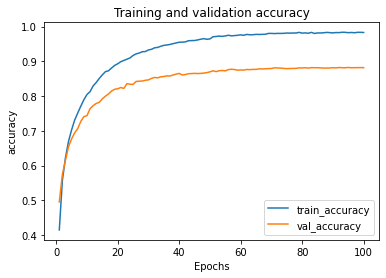

In [ ]:
# Epochs vs Accuracy

plot_metric(history_xception_new, 'accuracy')

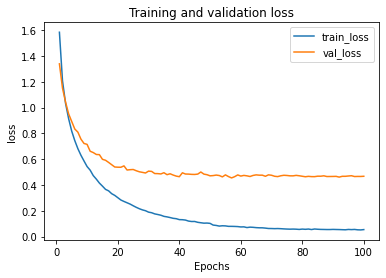

In [ ]:
# Epochs vs Loss

plot_metric(history_xception_new, 'loss')

In [ ]:
xception_model_new.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [ ]:
loss_test, acc_test = xception_model.evaluate(test_dataset)

199/199 [==============================] - 168s 803ms/step - loss: 0.3939 - accuracy: 0.8943


In [ ]:
y_pred_xcep = xception_model.predict(test_dataset)

In [ ]:
y_pred_xcep

array([[9.9949229e-01, 4.9651292e-04, 1.6000088e-06, ..., 5.2396791e-07,
        1.6299208e-06, 5.7307830e-09],
       [9.9960071e-01, 3.2124721e-08, 1.4457422e-04, ..., 9.5185277e-07,
        6.1758629e-09, 2.2282636e-12],
       [9.3050742e-01, 3.3624114e-03, 6.3568175e-02, ..., 4.5988281e-06,
        4.5647354e-05, 1.0672892e-07],
       ...,
       [1.1263662e-06, 1.8970670e-05, 2.9280975e-05, ..., 1.4870651e-05,
        2.3843998e-11, 9.9990964e-01],
       [2.1139905e-09, 1.0405095e-05, 6.3488469e-06, ..., 9.5450599e-09,
        1.5304409e-10, 9.9998200e-01],
       [3.5216984e-14, 7.8225512e-06, 7.5195231e-08, ..., 2.8718841e-09,
        4.5597684e-12, 9.9995542e-01]], dtype=float32)

In [ ]:
predicted_xcep = tf.argmax(y_pred_xcep, axis=1)
predicted_xcep

<tf.Tensor: shape=(6346,), dtype=int64, numpy=array([0, 0, 0, ..., 7, 7, 7])>

In [ ]:
true_xcep = tf.concat([y for x, y in test_dataset], axis=0)
true_xcep

<tf.Tensor: shape=(6346, 8), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
true_xcep = tf.argmax(true_xcep, axis=1)
true_xcep

<tf.Tensor: shape=(6346,), dtype=int64, numpy=array([0, 0, 0, ..., 7, 7, 7])>

In [ ]:
# Xception Predictions

with tf.device('/device:GPU:0'):
    
    for i in range(0,len(predicted_xcep.numpy())):
      
        if predicted_xcep.numpy()[i] == 0:
          print("AK")
        elif predicted_xcep.numpy()[i] == 1:
          print("BCC")
        elif predicted_xcep.numpy()[i] == 2:
          print("BKL")
        elif predicted_xcep.numpy()[i] == 3:
          print("DF")
        elif predicted_xcep.numpy()[i] == 4:
          print("MEL")
        elif predicted_xcep.numpy()[i] == 5:
          print("NV")
        elif predicted_xcep.numpy()[i] == 6:
          print("SCC")
        elif predicted_xcep.numpy()[i] == 7:
          print("VASC")


Streaming output truncated to the last 5000 lines.
SCC
BCC
BCC
BCC
BCC
MEL
BCC
BCC
BCC
DF
BCC
BCC
MEL
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
NV
BCC
BCC
BCC
BCC
BCC
BCC
BCC
SCC
NV
BCC
BCC
BCC
BCC
SCC
BCC
BCC
BKL
BCC
BCC
BCC
MEL
BCC
BCC
BCC
AK
BCC
BCC
BCC
BCC
BCC
BCC
BCC
AK
AK
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
AK
BCC
BCC
BKL
BCC
BCC
AK
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
AK
BCC
BCC
BCC
BCC
BCC
AK
BKL
BCC
BCC
SCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
NV
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
AK
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BKL
BCC
BCC
BCC
MEL
BCC
BCC
BCC
BCC
BKL
BCC
BCC
BCC
BCC
MEL
BKL
BCC
BCC
BCC
BCC
BCC
BKL
BKL
BKL
BKL
BKL
BKL
BKL
MEL
BKL
BKL
BKL
BKL
AK
BKL
BCC
MEL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
DF
BKL
BCC
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
MEL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BCC
BKL

In [ ]:
# Confusion matrix for Xception

conf_mat_xcep = confusion_matrix(true_xcep,predicted_xcep)

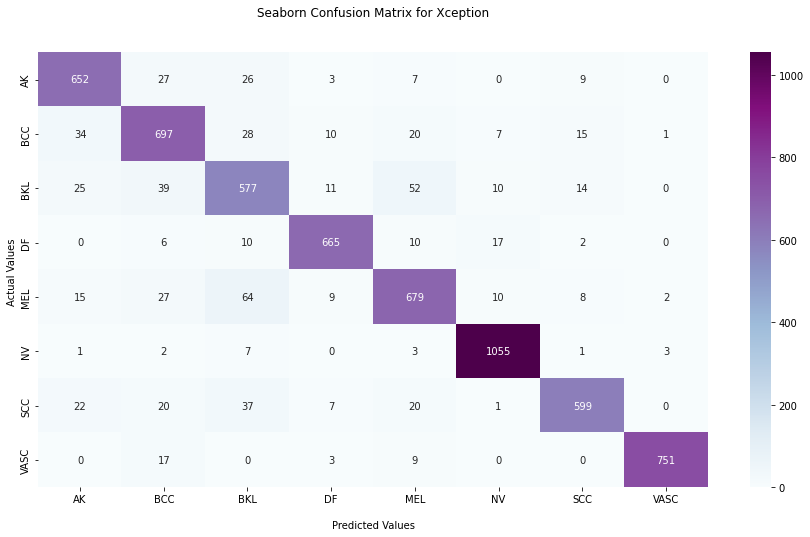

In [ ]:
# Plotting the confusion matrix

plt.figure(figsize = (15,8))

ax = sns.heatmap(conf_mat_xcep, annot=True, cmap='BuPu', fmt='.0f')
ax.set_title('Seaborn Confusion Matrix for Xception\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.set_xticklabels(['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC'])
ax.set_yticklabels(['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(metrics.classification_report(true_xcep, predicted_xcep, digits=8))

              precision    recall  f1-score   support

           0  0.87049399 0.90055249 0.88526816       724
           1  0.83473054 0.85837438 0.84638737       812
           2  0.77036048 0.79258242 0.78131347       728
           3  0.93926554 0.93661972 0.93794076       710
           4  0.84875000 0.83415233 0.84138786       814
           5  0.95909091 0.98414179 0.97145488      1072
           6  0.92438272 0.84844193 0.88478582       706
           7  0.99207398 0.96282051 0.97722837       780

    accuracy                      0.89426410      6346
   macro avg  0.89239352 0.88971070 0.89072084      6346
weighted avg  0.89524104 0.89426410 0.89444077      6346



## Mobilenet

In [ ]:
with tf.device('/device:GPU:0'):
    base_model_mobilenet = MobileNet(include_top = False, weights = 'imagenet', input_shape = (224, 224, 3))
    with tf.device('/device:GPU:0'):

        for layer in base_model_mobilenet.layers:
            print(layer.name)
            if hasattr(layer, 'moving_mean') and hasattr(layer, 'moving_variance'):
                layer.trainable = True
                K.eval(K.update(layer.moving_mean, K.zeros_like(layer.moving_mean)))
                K.eval(K.update(layer.moving_variance, K.zeros_like(layer.moving_variance)))
            else:
                layer.trainable = False

    print(len(base_model_mobilenet.layers))

input_7
conv1
conv1_bn
conv1_relu
conv_dw_1
conv_dw_1_bn
conv_dw_1_relu
conv_pw_1
conv_pw_1_bn
conv_pw_1_relu
conv_pad_2
conv_dw_2
conv_dw_2_bn
conv_dw_2_relu
conv_pw_2
conv_pw_2_bn
conv_pw_2_relu
conv_dw_3
conv_dw_3_bn
conv_dw_3_relu
conv_pw_3
conv_pw_3_bn
conv_pw_3_relu
conv_pad_4
conv_dw_4
conv_dw_4_bn
conv_dw_4_relu
conv_pw_4
conv_pw_4_bn
conv_pw_4_relu
conv_dw_5
conv_dw_5_bn
conv_dw_5_relu
conv_pw_5
conv_pw_5_bn
conv_pw_5_relu
conv_pad_6
conv_dw_6
conv_dw_6_bn
conv_dw_6_relu
conv_pw_6
conv_pw_6_bn
conv_pw_6_relu
conv_dw_7
conv_dw_7_bn
conv_dw_7_relu
conv_pw_7
conv_pw_7_bn
conv_pw_7_relu
conv_dw_8
conv_dw_8_bn
conv_dw_8_relu
conv_pw_8
conv_pw_8_bn
conv_pw_8_relu
conv_dw_9
conv_dw_9_bn
conv_dw_9_relu
conv_pw_9
conv_pw_9_bn
conv_pw_9_relu
conv_dw_10
conv_dw_10_bn
conv_dw_10_relu
conv_pw_10
conv_pw_10_bn
conv_pw_10_relu
conv_dw_11
conv_dw_11_bn
conv_dw_11_relu
conv_pw_11
conv_pw_11_bn
conv_pw_11_relu
conv_pad_12
conv_dw_12
conv_dw_12_bn
conv_dw_12_relu
conv_pw_12
conv_pw_12_bn
conv_pw

In [ ]:
with tf.device('/device:GPU:0'):

    last_layer_mobi = base_model_mobilenet.get_layer('conv_pw_13_relu')
    print('last layer output shape:', last_layer_mobi.output_shape)
    last_output_mobi = last_layer_mobi.output

last layer output shape: (None, 7, 7, 1024)


In [ ]:
#Mobilenet
with tf.device('/device:GPU:0'):

    # Flatten the output layer to 1 dimension
    x = layers.GlobalMaxPooling2D()(last_output_mobi)
    # Add a fully connected layer with 512 hidden units and ReLU activation
    x = layers.Dense(512, activation='relu')(x)
    # Add a dropout rate of 0.5
    x = layers.Dropout(0.5)(x)
    # Add a final softmax layer for classification
    x = layers.Dense(8, activation='softmax')(x)

    # Configure and compile the model

    mobilenet_model_new = Model(base_model_mobilenet.input, x)

In [ ]:
mobilenet_model_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
with tf.device('/device:GPU:0'):
    optimizer_adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)

    mobilenet_model_new.compile(optimizer = optimizer_adam,
                                  loss = 'categorical_crossentropy', 
                                  metrics = ['accuracy'])

In [ ]:
with tf.device('/device:GPU:0'):

    checkpointer = ModelCheckpoint(filepath='Saved models/weights.best.mobilenet.hdf5', 
                                  verbose=1, 
                                  save_best_only=False)

    history_mobilenet = mobilenet_model_new.fit(train_dataset, 
                        validation_data = validation_dataset,
                        epochs = 200,
                        callbacks=[checkpointer, learning_rate_reduction], 
                        verbose=1)

Epoch 1/200
1230/1230 [==============================] - ETA: 0s - loss: 1.8429 - accuracy: 0.3132
Epoch 00001: saving model to Saved models/weights.best.mobilenet.hdf5
1230/1230 [==============================] - 1799s 1s/step - loss: 1.8429 - accuracy: 0.3132 - val_loss: 1.5535 - val_accuracy: 0.4267 - lr: 1.0000e-04
Epoch 2/200
1229/1230 [============================>.] - ETA: 0s - loss: 1.5338 - accuracy: 0.4285
Epoch 00002: saving model to Saved models/weights.best.mobilenet.hdf5
1230/1230 [==============================] - 108s 88ms/step - loss: 1.5338 - accuracy: 0.4285 - val_loss: 1.3973 - val_accuracy: 0.4821 - lr: 1.0000e-04
Epoch 3/200
1229/1230 [============================>.] - ETA: 0s - loss: 1.3977 - accuracy: 0.4801
Epoch 00003: saving model to Saved models/weights.best.mobilenet.hdf5
1230/1230 [==============================] - 108s 87ms/step - loss: 1.3978 - accuracy: 0.4801 - val_loss: 1.2937 - val_accuracy: 0.5184 - lr: 1.0000e-04
Epoch 4/200
1229/1230 [============

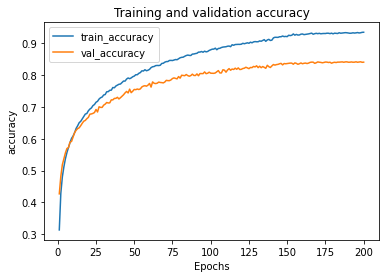

In [ ]:
# Epochs vs Accuracy

plot_metric(history_mobilenet,'accuracy')

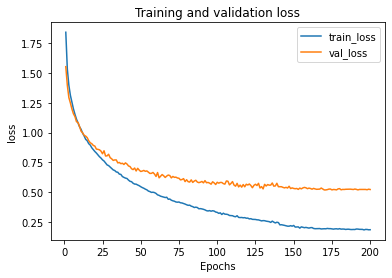

In [ ]:
# Epochs vs Loss

plot_metric(history_mobilenet,'loss')

In [ ]:
#Saving the Mobilenet model with .h5 extension
with tf.device('/device:GPU:0'):
    mobilenet_model_new.save("/content/gdrive/MyDrive/models/Mobilenet.h5")

In [ ]:
loss_test_mobi, acc_test_mobi = mobilenet_model.evaluate(test_dataset)

199/199 [==============================] - 10s 47ms/step - loss: 0.4354 - accuracy: 0.8657


In [ ]:
y_pred_mobi = mobilenet_model.predict(test_dataset)

In [ ]:
predicted_mobi = tf.argmax(y_pred_mobi, axis=1)
predicted_mobi

<tf.Tensor: shape=(6346,), dtype=int64, numpy=array([0, 0, 0, ..., 7, 7, 7])>

In [ ]:
true_mobi = tf.concat([y for x, y in test_dataset], axis=0)
true_mobi

<tf.Tensor: shape=(6346, 8), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
true_mobi = tf.argmax(true_mobi, axis=1)
true_mobi

<tf.Tensor: shape=(6346,), dtype=int64, numpy=array([0, 0, 0, ..., 7, 7, 7])>

In [ ]:
# Mobilenet Predictions

with tf.device('/device:GPU:0'):
    
    for i in range(0,len(predicted_mobi.numpy())):
      
        if predicted_mobi.numpy()[i] == 0:
          print("AK")
        elif predicted_mobi.numpy()[i] == 1:
          print("BCC")
        elif predicted_mobi.numpy()[i] == 2:
          print("BKL")
        elif predicted_mobi.numpy()[i] == 3:
          print("DF")
        elif predicted_mobi.numpy()[i] == 4:
          print("MEL")
        elif predicted_mobi.numpy()[i] == 5:
          print("NV")
        elif predicted_mobi.numpy()[i] == 6:
          print("SCC")
        elif predicted_mobi.numpy()[i] == 7:
          print("VASC")

Streaming output truncated to the last 5000 lines.
BCC
BCC
BCC
BCC
DF
BCC
BCC
SCC
BCC
BCC
BCC
MEL
BCC
SCC
SCC
BCC
BCC
BCC
AK
BCC
BCC
NV
BCC
BCC
AK
BCC
BCC
BCC
BCC
AK
BCC
BCC
BCC
BCC
BCC
SCC
SCC
BKL
BKL
BCC
BCC
AK
BCC
BCC
BCC
BCC
AK
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
SCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
AK
BKL
BCC
BKL
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
VASC
BCC
BKL
SCC
BCC
BCC
BCC
BCC
BCC
SCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
SCC
BCC
BCC
BCC
BKL
BCC
AK
AK
BCC
BCC
BCC
MEL
BCC
MEL
BKL
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BKL
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BKL
BCC
SCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
DF
BCC
DF
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
VASC
SCC
BCC
BCC
BCC
DF
MEL
BCC
BCC
BKL
BCC
BCC
BCC
BKL
MEL
BKL
MEL
BKL
BKL
BKL
BKL
AK
BKL
BKL
BKL
MEL
MEL
BKL
MEL
BKL
BKL
BCC
BCC
BKL
BKL
BKL
AK
BCC
BKL
BCC
BKL
BKL
BKL
BKL
DF
BKL
BKL
BKL
AK
BKL
BKL
BKL
BKL
AK
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
B

In [ ]:
# Confusion matrix for Mobilenet
conf_mat_mobi = confusion_matrix(true_mobi,predicted_mobi)

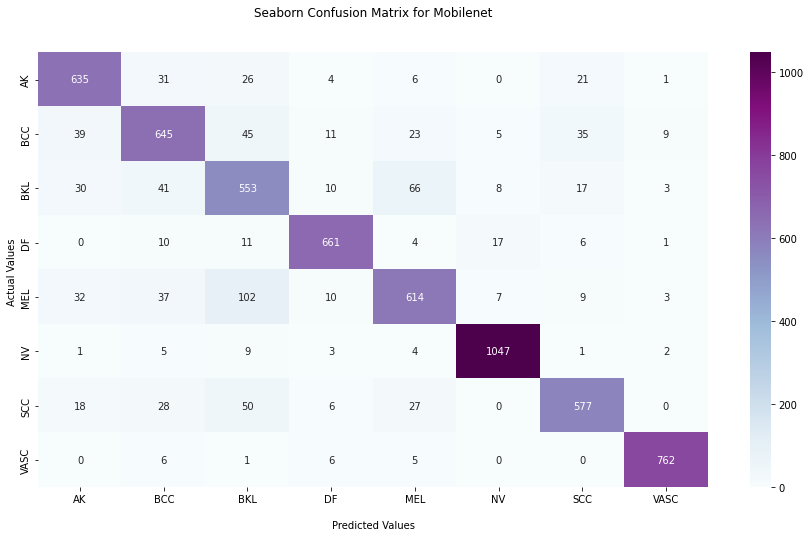

In [ ]:
# Plotting the confusion matrix

plt.figure(figsize = (15,8))

ax = sns.heatmap(conf_mat_mobi, annot=True, cmap='BuPu', fmt='.0f')
ax.set_title('Seaborn Confusion Matrix for Mobilenet\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.set_xticklabels(['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC'])
ax.set_yticklabels(['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(metrics.classification_report(true_mobi, predicted_mobi, digits=8))

              precision    recall  f1-score   support

           0  0.84105960 0.87707182 0.85868830       724
           1  0.80323786 0.79433498 0.79876161       812
           2  0.69385194 0.75961538 0.72524590       728
           3  0.92967651 0.93098592 0.93033075       710
           4  0.81975968 0.75429975 0.78566859       814
           5  0.96586716 0.97667910 0.97124304      1072
           6  0.86636637 0.81728045 0.84110787       706
           7  0.97567222 0.97692308 0.97629725       780

    accuracy                      0.86574220      6346
   macro avg  0.86193642 0.86089881 0.86091791      6346
weighted avg  0.86695931 0.86574220 0.86587447      6346



## DenseNet201

In [ ]:
'''# Defining early stopping for densenet201
custom_early_stopping_densenet = EarlyStopping(
    monitor='val_accuracy', 
    patience=25, 
    min_delta=0.001, 
    mode='max'
)'''

In [ ]:
pre_trained_densenet_model = DenseNet201(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

In [ ]:
with tf.device('/device:GPU:0'):

    for layer in pre_trained_densenet_model.layers:
        print(layer.name)
        if hasattr(layer, 'moving_mean') and hasattr(layer, 'moving_variance'):
            layer.trainable = True
            K.eval(K.update(layer.moving_mean, K.zeros_like(layer.moving_mean)))
            K.eval(K.update(layer.moving_variance, K.zeros_like(layer.moving_variance)))
        else:
            layer.trainable = False

    print(len(pre_trained_densenet_model.layers))

input_1
zero_padding2d
conv1/conv
conv1/bn
conv1/relu
zero_padding2d_1
pool1
conv2_block1_0_bn
conv2_block1_0_relu
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_concat
conv2_block2_0_bn
conv2_block2_0_relu
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_concat
conv2_block3_0_bn
conv2_block3_0_relu
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_concat
conv2_block4_0_bn
conv2_block4_0_relu
conv2_block4_1_conv
conv2_block4_1_bn
conv2_block4_1_relu
conv2_block4_2_conv
conv2_block4_concat
conv2_block5_0_bn
conv2_block5_0_relu
conv2_block5_1_conv
conv2_block5_1_bn
conv2_block5_1_relu
conv2_block5_2_conv
conv2_block5_concat
conv2_block6_0_bn
conv2_block6_0_relu
conv2_block6_1_conv
conv2_block6_1_bn
conv2_block6_1_relu
conv2_block6_2_conv
conv2_block6_concat
pool2_bn
pool2_relu
pool2_conv
pool2_pool
conv3_block1_0_bn
conv3_block1_0_relu
conv3_block1_1_conv
conv3_b

In [ ]:
with tf.device('/device:GPU:0'):

    last_layer = pre_trained_densenet_model.get_layer('relu')
    print('last layer output shape:', last_layer.output_shape)
    last_output = last_layer.output

last layer output shape: (None, 7, 7, 1920)


Defining the Model

In [ ]:
with tf.device('/device:GPU:0'):

    # Flatten the output layer to 1 dimension
    x = layers.GlobalMaxPooling2D()(last_output)
    # Add a fully connected layer with 512 hidden units and ReLU activation
    x = layers.Dense(512, activation='relu')(x)
    # Add a dropout rate of 0.7
    x = layers.Dropout(0.5)(x)
    # Add a final softmax layer for classification
    x = layers.Dense(num_classes, activation='softmax')(x)

    # Configure and compile the model

    densenet_model = Model(pre_trained_densenet_model.input, x)
    optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
    densenet_model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
densenet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [ ]:
with tf.device('/device:GPU:0'):

  tensor_board = TensorBoard(log_dir='./logs', histogram_freq = 0, batch_size = None)
  checkpointer_densenet = ModelCheckpoint(filepath='Saved models/weights.best.densenet.hdf5', 
                                  verbose=1, 
                                  save_best_only=False)
  history_densenet = densenet_model.fit(train_dataset,validation_data = validation_dataset,
                        epochs = 50,
                        callbacks=[checkpointer_densenet,tensor_board, learning_rate_reduction], 
                        verbose=1)                   

Epoch 1/50
1230/1230 [==============================] - ETA: 0s - loss: 1.6239 - accuracy: 0.4492
Epoch 00001: saving model to Saved models/weights.best.densenet.hdf5
1230/1230 [==============================] - 1057s 839ms/step - loss: 1.6239 - accuracy: 0.4492 - val_loss: 1.1164 - val_accuracy: 0.5788 - lr: 1.0000e-04
Epoch 2/50
1230/1230 [==============================] - ETA: 0s - loss: 0.9686 - accuracy: 0.6446
Epoch 00002: saving model to Saved models/weights.best.densenet.hdf5
1230/1230 [==============================] - 348s 282ms/step - loss: 0.9686 - accuracy: 0.6446 - val_loss: 0.8487 - val_accuracy: 0.6837 - lr: 1.0000e-04
Epoch 3/50
1230/1230 [==============================] - ETA: 0s - loss: 0.7534 - accuracy: 0.7233
Epoch 00003: saving model to Saved models/weights.best.densenet.hdf5
1230/1230 [==============================] - 348s 282ms/step - loss: 0.7534 - accuracy: 0.7233 - val_loss: 0.7231 - val_accuracy: 0.7323 - lr: 1.0000e-04
Epoch 4/50
1230/1230 [==============

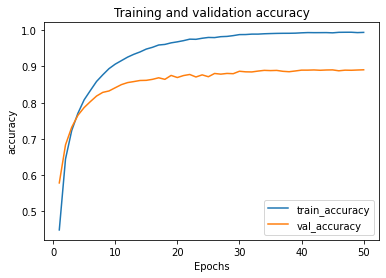

In [ ]:
# Epochs vs Accuracy

plot_metric(history_densenet, 'accuracy')

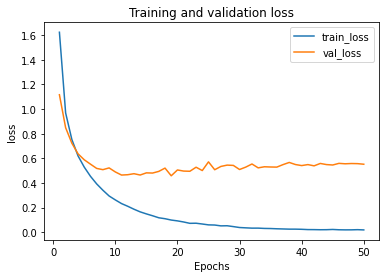

In [ ]:
# Epochs vs Loss

plot_metric(history_densenet, 'loss')

In [ ]:
with tf.device('/device:GPU:0'):
    densenet_model.save("/content/gdrive/MyDrive/models/Densenet201.h5")

In [ ]:
loss_test_dense, acc_test_dense = densenet_model.evaluate(test_dataset)

199/199 [==============================] - 24s 97ms/step - loss: 0.4525 - accuracy: 0.9110


In [ ]:
y_pred_dense = densenet_model.predict(test_dataset)

In [ ]:
predicted_dense = tf.argmax(y_pred_dense, axis=1)
predicted_dense

<tf.Tensor: shape=(6346,), dtype=int64, numpy=array([0, 0, 0, ..., 7, 7, 7])>

In [ ]:
true_dense = tf.concat([y for x, y in test_dataset], axis=0)
true_dense

<tf.Tensor: shape=(6346, 8), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
true_dense = tf.argmax(true_dense, axis=1)
true_dense

<tf.Tensor: shape=(6346,), dtype=int64, numpy=array([0, 0, 0, ..., 7, 7, 7])>

In [ ]:
with tf.device('/device:GPU:0'):
    
    for i in range(0,len(predicted_dense.numpy())):
      
        if predicted_dense.numpy()[i] == 0:
          print("AK")
        elif predicted_dense.numpy()[i] == 1:
          print("BCC")
        elif predicted_dense.numpy()[i] == 2:
          print("BKL")
        elif predicted_dense.numpy()[i] == 3:
          print("DF")
        elif predicted_dense.numpy()[i] == 4:
          print("MEL")
        elif predicted_dense.numpy()[i] == 5:
          print("NV")
        elif predicted_dense.numpy()[i] == 6:
          print("SCC")
        elif predicted_dense.numpy()[i] == 7:
          print("VASC")


Streaming output truncated to the last 5000 lines.
BCC
BCC
BCC
BCC
BCC
MEL
BCC
BCC
BCC
BCC
BCC
BCC
MEL
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BKL
AK
BCC
BCC
SCC
BCC
BCC
BCC
BCC
AK
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BKL
BCC
BCC
BCC
BCC
AK
BCC
BCC
AK
BCC
BKL
BCC
BCC
BCC
BCC
BCC
AK
BCC
BCC
BCC
BCC
BCC
BCC
BCC
MEL
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BKL
BCC
MEL
BCC
BCC
BCC
BCC
BCC
BCC
SCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
MEL
SCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
MEL
AK
BCC
SCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
MEL
BCC
BCC
BCC
BCC
BCC
SCC
BCC
BCC
BCC
BCC
BCC
AK
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BCC
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
MEL
BKL
MEL
BKL
AK
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BCC
BKL
AK
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
MEL
BKL
BKL
BKL
BKL
BKL
BKL
BKL
BK

In [ ]:
# Confusion matrix for Densenet
conf_mat_dense = confusion_matrix(true_dense, predicted_dense)

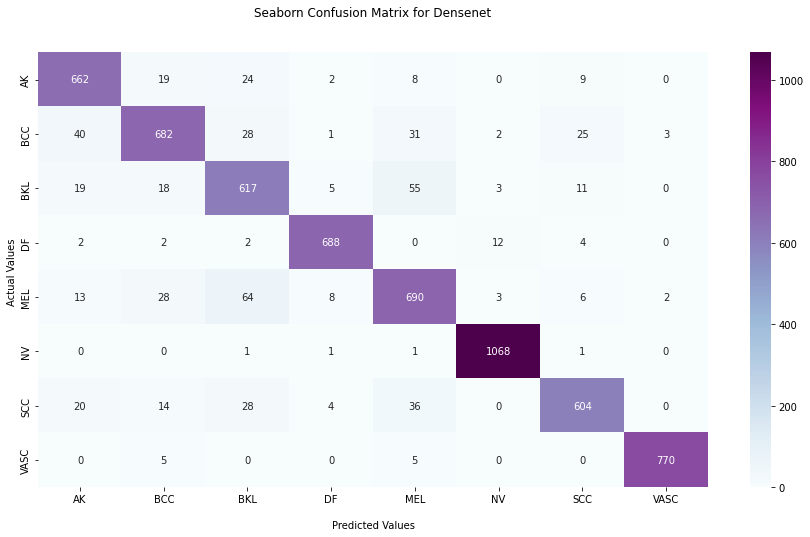

In [ ]:
# Plotting the confusion matrix

plt.figure(figsize = (15,8))
ax = sns.heatmap(conf_mat_dense, annot=True, cmap='BuPu', fmt='.0f')
ax.set_title('Seaborn Confusion Matrix for Densenet\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.set_xticklabels(['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC'])
ax.set_yticklabels(['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(metrics.classification_report(true_dense, predicted_dense, digits=8))

              precision    recall  f1-score   support

           0  0.87566138 0.91436464 0.89459459       724
           1  0.88802083 0.83990148 0.86329114       812
           2  0.80759162 0.84752747 0.82707775       728
           3  0.97038082 0.96901408 0.96969697       710
           4  0.83535109 0.84766585 0.84146341       814
           5  0.98161765 0.99626866 0.98888889      1072
           6  0.91515152 0.85552408 0.88433382       706
           7  0.99354839 0.98717949 0.99035370       780

    accuracy                      0.91096754      6346
   macro avg  0.90841541 0.90718072 0.90746253      6346
weighted avg  0.91164252 0.91096754 0.91098834      6346



In [ ]:
# Creating the function

from collections import Counter

with tf.device('/device:GPU:0'):

   def Majority_Voting(predicted_dense, predicted_mobi, predicted_xcep): 
        final_pred = []
      
        for i in range(0, 6346):
            x = []
            x = Counter([predicted_dense.numpy()[i], predicted_mobi.numpy()[i], predicted_xcep.numpy()[i]])

            final_pred = np.append(final_pred, x.most_common(1)[0][0])
        return final_pred

In [ ]:
final_preds = Majority_Voting(predicted_dense, predicted_mobi, predicted_xcep)
final_preds

array([0., 0., 0., ..., 7., 7., 7.])

In [ ]:
true_ensemble = tf.concat([y for x, y in test_dataset], axis=0)

In [ ]:
true_ensemble = tf.argmax(true_ensemble, axis=1)
true_ensemble

<tf.Tensor: shape=(6346,), dtype=int64, numpy=array([0, 0, 0, ..., 7, 7, 7])>

In [ ]:
print("Ensemble Accuracy:", round(accuracy_score(true_ensemble,final_preds)*100, 2),'%')

Ensemble Accuracy: 91.96 %


In [ ]:
# Confusion Matrix for Ensemble Model

conf_mat_ensemble = confusion_matrix(true_ensemble, final_preds)

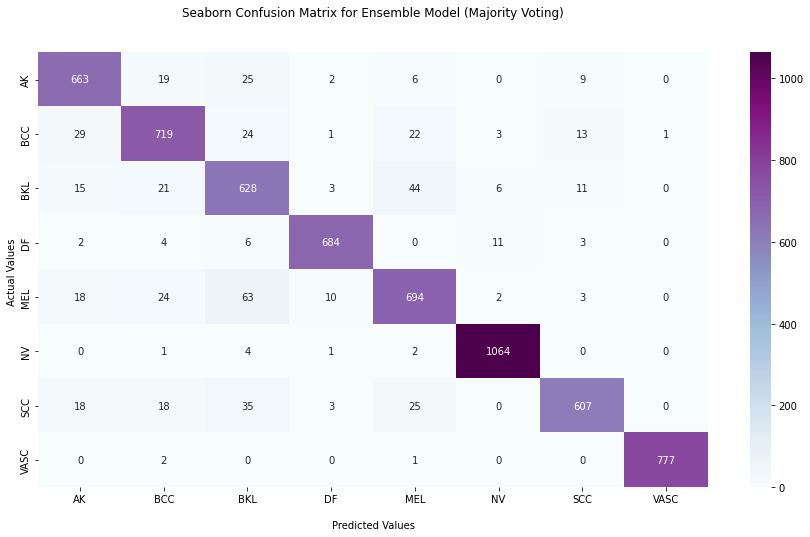

In [ ]:
# Plotting the confusion matrix

plt.figure(figsize = (15,8))
ax = sns.heatmap(conf_mat_ensemble, annot=True, cmap='BuPu', fmt='.0f')
ax.set_title('Seaborn Confusion Matrix for Ensemble Model (Majority Voting)\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.set_xticklabels(['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC'])
ax.set_yticklabels(['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(metrics.classification_report(true_ensemble, final_preds, digits=8))

              precision    recall  f1-score   support

           0  0.88993289 0.91574586 0.90265487       724
           1  0.88985149 0.88546798 0.88765432       812
           2  0.80000000 0.86263736 0.83013880       728
           3  0.97159091 0.96338028 0.96746818       710
           4  0.87405542 0.85257985 0.86318408       814
           5  0.97974217 0.99253731 0.98609824      1072
           6  0.93962848 0.85977337 0.89792899       706
           7  0.99871465 0.99615385 0.99743261       780

    accuracy                      0.91963442      6346
   macro avg  0.91793950 0.91603448 0.91657001      6346
weighted avg  0.92077533 0.91963442 0.91982435      6346



## Ensemble Model (Soft Voting)

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
with tf.device('/device:GPU:0'):
    X_train_ens = tf.concat([x for x, y in train_dataset], axis=0)

InternalError: ignored

In [ ]:
with tf.device('/device:GPU:0'):
    y_train_ens = tf.concat([y for x, y in train_dataset], axis=0)

NameError: ignored

In [ ]:
estimator = []
estimator.append(('Xception', xception_model))
estimator.append(('Mobilenet', mobilenet_model))
estimator.append(('DenseNet201', densenet_model))

In [ ]:
estimator


[('Xception', <keras.engine.functional.Functional at 0x7ff08c7922d0>),
 ('Mobilenet', <keras.engine.functional.Functional at 0x7ff08c5e7d50>),
 ('DenseNet201', <keras.engine.functional.Functional at 0x7ff14d33efd0>)]

In [ ]:
with tf.device('/device:GPU:0'):

    # Voting Classifier with soft voting
    vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
    vot_soft.fit(X_train_ens, y_train_ens)

NameError: ignored

In [ ]:
y_pred_ensemble = vot_soft.predict(test_dataset)
  
# using accuracy_score
score = accuracy_score(true_ensemble,y_pred_ensemble)
print("Soft Voting Score % d" % score)

NotFittedError: ignored